<a href="https://colab.research.google.com/github/Dewak20/Dibimbing/blob/main/Dewa_Gede_Krishnadana_Customer_Churn_Modeling_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## Metadata

# Install & Load Library

In [42]:
!pip install dalex
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier

import dalex as dx

import scikitplot as skplt

%matplotlib inline

# Load Dataset

In [173]:
raw_data = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/bank_churn_dataset/bank_churn_data.csv")

# Data Inspection

In [174]:
raw_data

,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [175]:
df = raw_data.copy()

In [176]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
raw_data['education_level'] = labelencoder.fit_transform(raw_data['education_level'])
raw_data['income_category'] = labelencoder.fit_transform(raw_data['income_category'])
raw_data['attrition_flag'] = labelencoder.fit_transform(raw_data['attrition_flag'])
raw_data['marital_status'] = labelencoder.fit_transform(raw_data['marital_status'])
raw_data['card_category'] = labelencoder.fit_transform(raw_data['card_category'])
raw_data['gender'] = labelencoder.fit_transform(raw_data['gender'])
raw_data


,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,1,45,1,3,3,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,2,2,4,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,2,1,3,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,3,3,4,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,5,1,2,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,1,2,2,2,1,0,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,0,41,1,2,6,0,1,0,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,0,44,0,1,3,1,4,0,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,0,30,1,2,2,3,1,0,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [177]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10127 non-null  int64  
 1   attrition_flag            10127 non-null  int64  
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  int64  
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  int64  
 6   marital_status            10127 non-null  int64  
 7   income_category           10127 non-null  int64  
 8   card_category             10127 non-null  int64  
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

Check missing values

In [178]:
raw_data.isna().sum()

user_id                     0
attrition_flag              0
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
avg_open_to_buy             0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
total_ct_chng_q4_q1         0
avg_utilization_ratio       0
dtype: int64

Typecasting categorical variables into numeric

Check new data structure

In [179]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10127 non-null  int64  
 1   attrition_flag            10127 non-null  int64  
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  int64  
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  int64  
 6   marital_status            10127 non-null  int64  
 7   income_category           10127 non-null  int64  
 8   card_category             10127 non-null  int64  
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

We need to remove Customer ID from dataset

In [180]:
raw_data = raw_data.drop(["user_id"], axis = 1)

# Train-Test Split Data

Split data before data exploration and engineering

In [181]:
X = raw_data.drop(["attrition_flag"], axis = 1)
y = raw_data["attrition_flag"]

In [182]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size=0.2,
    stratify = y, 
    random_state=1000
)

# Data Exploration

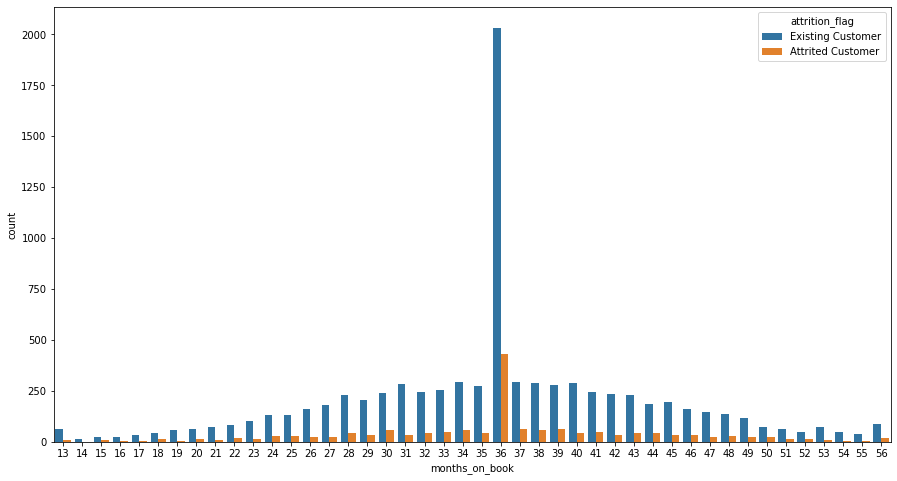

In [183]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(data=df, x="months_on_book", hue="attrition_flag")

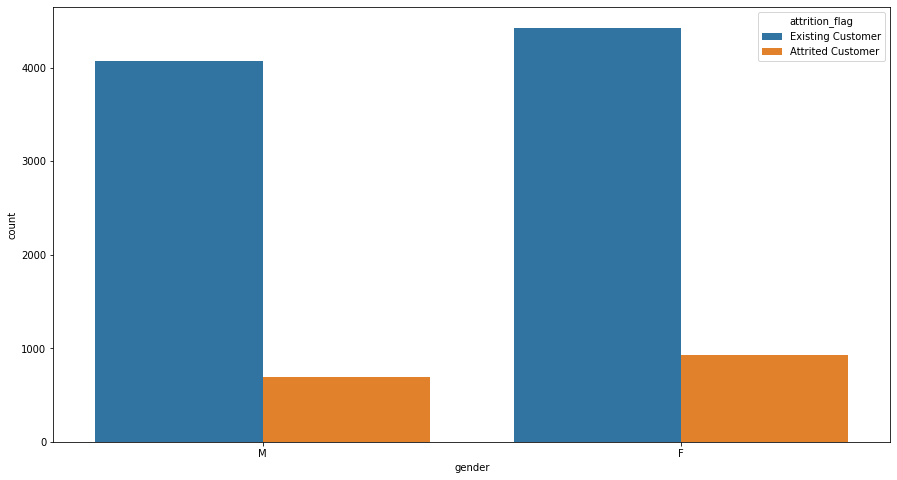

In [184]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(data=df, x="gender", hue="attrition_flag")

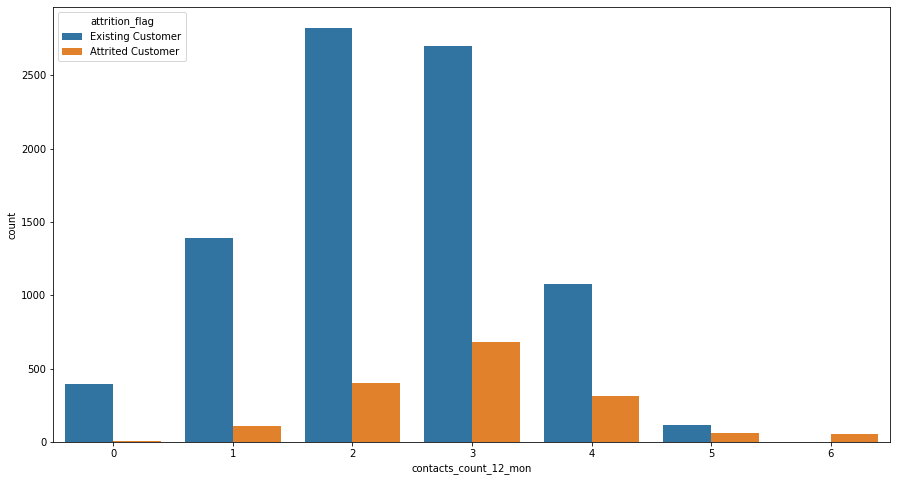

In [185]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(data=df, x="contacts_count_12_mon", hue="attrition_flag")

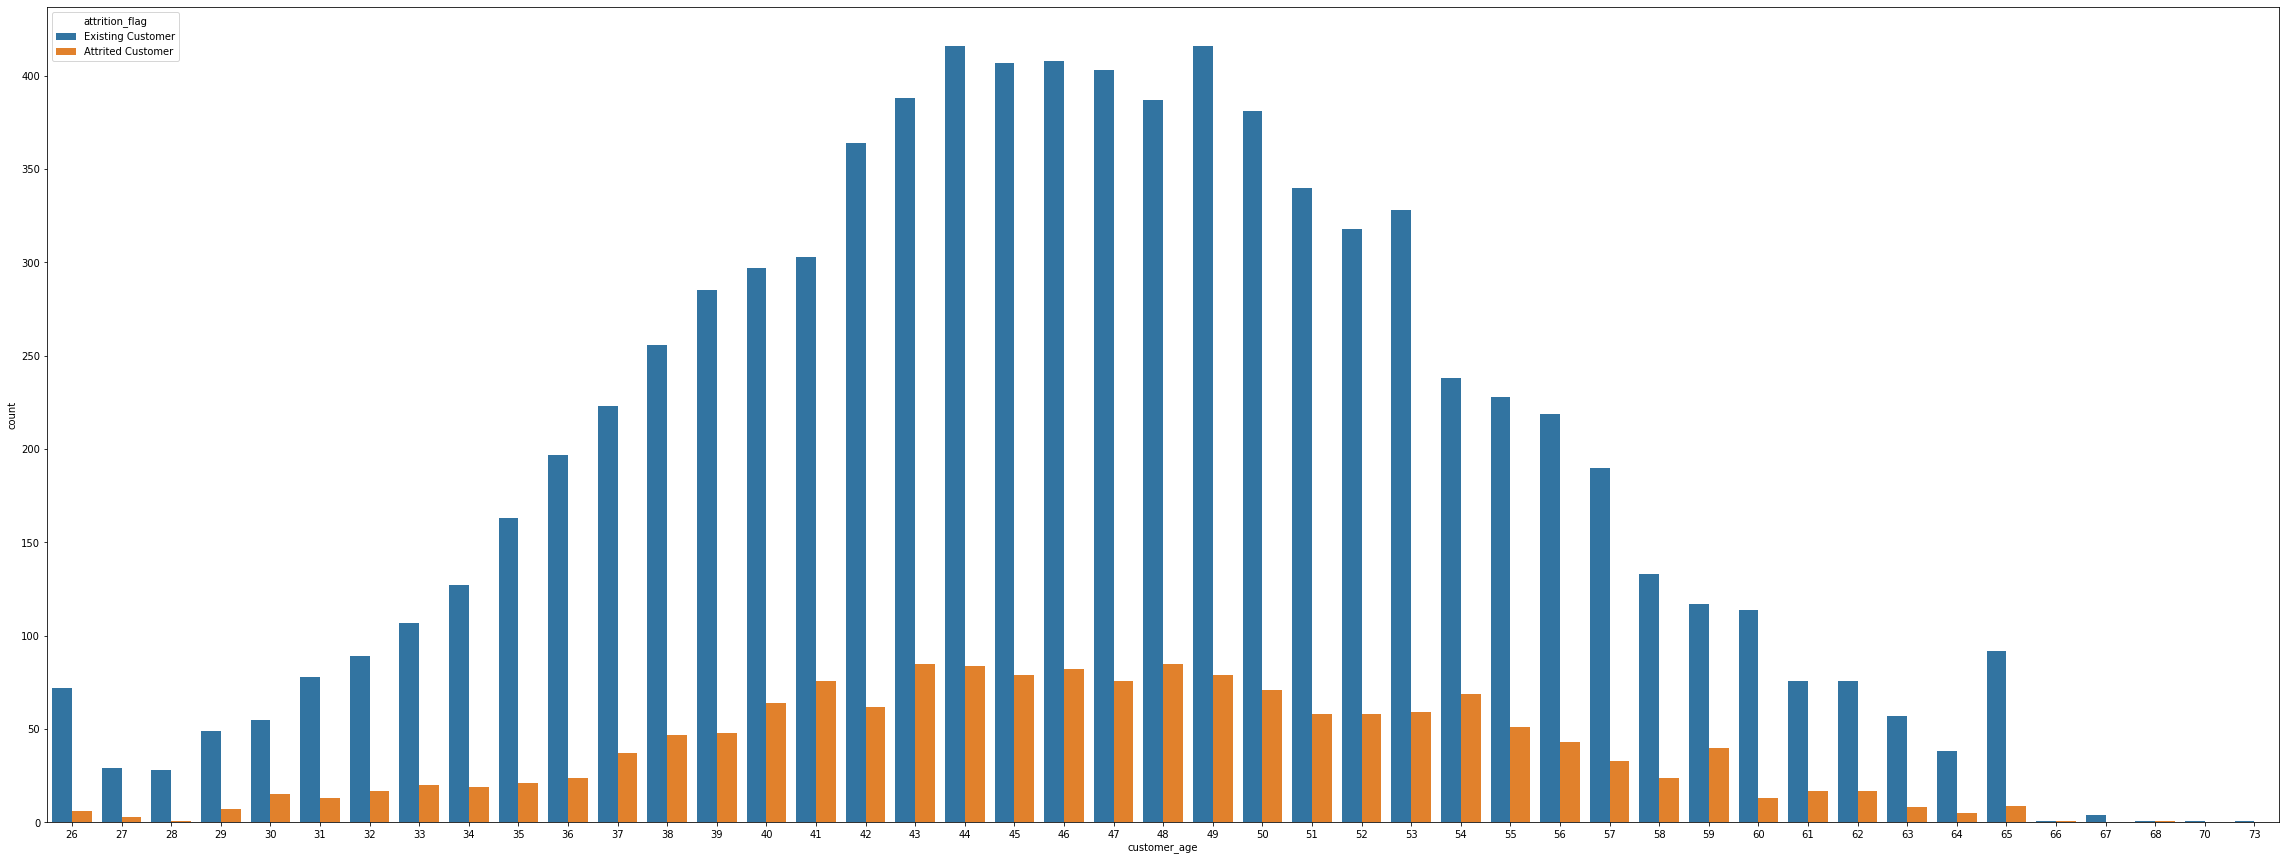

In [186]:
fig, ax = plt.subplots(figsize=(40, 15))
sns.countplot(data=df, x="customer_age", hue="attrition_flag")

In [187]:
X_train["attrition_flag"] = y_train

Let's check target distribution

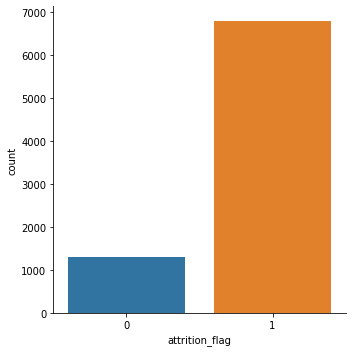

In [188]:
sns.catplot(x = "attrition_flag", kind = "count", data = X_train);

In [189]:
y_train.value_counts(normalize=True)

1    0.839279
0    0.160721
Name: attrition_flag, dtype: float64

We can observe there imbalance case in our dataset. We can solve this in two ways:

- While modeling, by adding weight on model parameter
- Post-modeling, by changing classification threhold to optimize metrics such as F1-Score, precision, recall, etc
- Pre-modeling, by doing resamping such as oversampling, downsampling, and mixed sampling

We gonna do pre-modelling oversampling if necessary

Next we gonna check multicolinearity for each variable


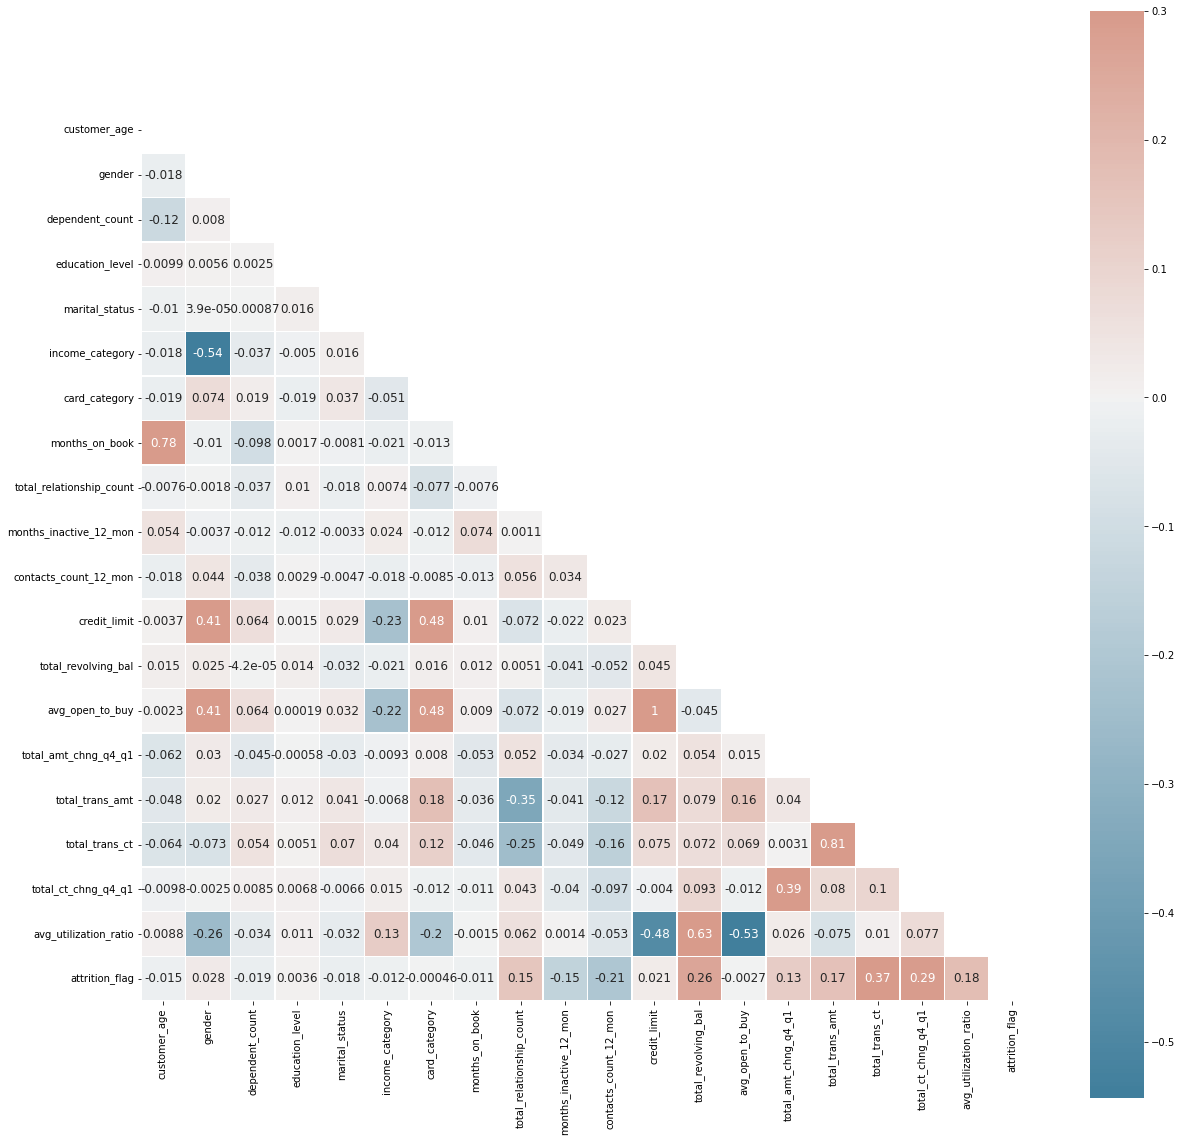

In [190]:
corr = X_train.corr()
masking = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr, 
    mask=masking, 
    cmap=cmap, 
    vmax=.3, 
    center=0,
    square=True, 
    linewidths=.5,
    annot=True,
    annot_kws={'size':12}
);

In [191]:
X_train = X_train.drop(["attrition_flag"], axis = 1)


In [192]:
X_train = X_train.drop(["months_on_book",'avg_open_to_buy'], axis = 1)

In [193]:
X_test = X_test.drop(["months_on_book",'avg_open_to_buy'], axis = 1)

In [194]:
X_test = X_test.drop(["total_trans_amt"], axis = 1)
X_train = X_train.drop(["total_trans_amt"], axis = 1)

# Modeling

## Define Model

We will use 3 models:

- Decision tree as a baseline model
- Random Forest
- SVM RBF

In [207]:
y_train.value_counts(normalize=True)

1    0.839279
0    0.160721
Name: attrition_flag, dtype: float64

**Decision Tree**

In [208]:
dc_clf = DecisionTreeClassifier(
    max_depth = 5,
    ccp_alpha = 0.001,
    class_weight = {0: 0.265353, 1:0.734647}
)

**Random Forest**

In [209]:
rf_clf = RandomForestClassifier(
    random_state=1000,
    n_estimators=1000,
    class_weight = {0: 0.265353, 1:0.734647}
)

**SVM RBF**

In [210]:
svm_clf = SVC(
    random_state = 1000,
    probability=True,
    class_weight = {0: 0.265353, 1:0.734647}
)

## Fitting Model to Data

**Decision Tree**

In [211]:
dc_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, class_weight={0: 0.265353, 1: 0.734647},
                       max_depth=5)

**Random Forest**

In [212]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.265353, 1: 0.734647},
                       n_estimators=1000, random_state=1000)

**SVM RBF**

In [213]:
svm_clf.fit(X_train, y_train)

SVC(class_weight={0: 0.265353, 1: 0.734647}, probability=True,
    random_state=1000)

## Model Evaluation

In [214]:
X_train.shape

(8101, 16)

In [215]:
X_test.shape

(2026, 16)

In [216]:

# decision tree prediction
dc_pred = dc_clf.predict(X_test)
dc_pred_proba = dc_clf.predict_proba(X_test)

# random forest prediction
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)

# SVM RBF prediction
svm_pred = svm_clf.predict(X_test)
svm_pred_proba = svm_clf.predict_proba(X_test)


**Decision Tree**

In [217]:
pd.DataFrame(metrics.classification_report(y_test, dc_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.915385,0.891350,0.892892,0.903367,0.895206
recall,0.366154,0.993533,0.892892,0.679844,0.892892
f1-score,0.523077,0.939672,0.892892,0.731374,0.872844
support,325.000000,1701.000000,0.892892,2026.000000,2026.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



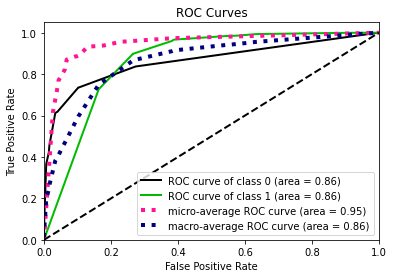

In [218]:
skplt.metrics.plot_roc_curve(y_test, dc_pred_proba);

**Random Forest**

In [219]:
pd.DataFrame(metrics.classification_report(y_test, rf_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.869888,0.948207,0.937808,0.909048,0.935644
recall,0.720000,0.979424,0.937808,0.849712,0.937808
f1-score,0.787879,0.963563,0.937808,0.875721,0.935380
support,325.000000,1701.000000,0.937808,2026.000000,2026.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



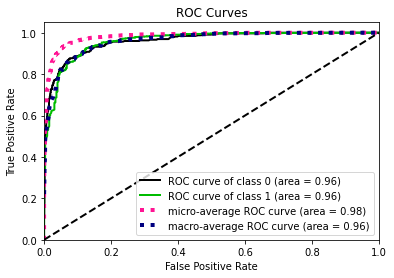

In [220]:
skplt.metrics.plot_roc_curve(y_test, rf_pred_proba);

**SVM RBF**

In [221]:
pd.DataFrame(metrics.classification_report(y_test, svm_pred, target_names=['Not Churn','Churn'], output_dict=True))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.0,0.839585,0.839585,0.419793,0.704904
recall,0.0,1.000000,0.839585,0.500000,0.839585
f1-score,0.0,0.912798,0.839585,0.456399,0.766372
support,325.0,1701.000000,0.839585,2026.000000,2026.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



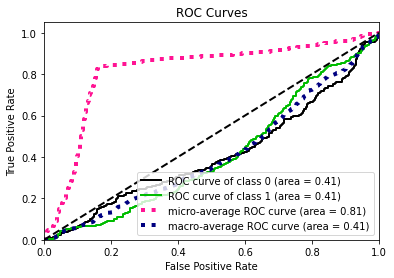

In [222]:
skplt.metrics.plot_roc_curve(y_test, svm_pred_proba);

In [230]:
# Inititate Explainer for all models

## initiate explainer for Random Forest model
churn_rf_exp = dx.Explainer(rf_clf, X_train, y_train, label = "RF Interpretation")
## initiate explainer for MLP model
churn_dc_exp = dx.Explainer(dc_clf, X_train, y_train, label = "DC Interpretation")
## initiate explainer for XGBoost model
churn_svm_exp = dx.Explainer(svm_clf, X_train, y_train, label = "SVM Interpretation")

Preparation of a new explainer is initiated

  -> data              : 8101 rows 16 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 8101 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : RF Interpretation
  -> predict function  : <function yhat_proba_default at 0x7f5dc1fc3680> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



  -> predicted values  : min = 0.0, mean = 0.837, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.381, mean = 0.00218, max = 0.363
  -> model_info        : package sklearn

A new explainer has been created!
Preparation of a new explainer is initiated

  -> data              : 8101 rows 16 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 8101 values
  -> model_class       : sklearn.tree._classes.DecisionTreeClassifier (default)
  -> label             : DC Interpretation
  -> predict function  : <function yhat_proba_default at 0x7f5dc1fc3680> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.898, max = 0.985
  -> model type        : classification will be used (default)
  -> residual function : difference betwe

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



  -> predicted values  : min = 0.735, mean = 0.832, max = 0.936
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.936, mean = 0.00694, max = 0.265
  -> model_info        : package sklearn

A new explainer has been created!


In [224]:
# visualizr permutation feature importance for Random Forest Model
churn_rf_exp.model_parts().plot()

In [228]:
# visualize permutation feature importance for MLP model
churn_dc_exp.model_parts().plot()

In [231]:
# visualize permutation feature importance for SVM model
churn_svm_exp.model_parts().plot()

In [227]:
# create partial dependence plot of Random Forest model
churn_rf_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 16/16 [00:35<00:00,  2.20s/it]
